In [53]:
import importlib.util

# List of module 
modules = [
    "geopandas",
    "numpy",     
    "pyforestscan.handlers",
    "pyforestscan.visualize",
    "pyforestscan.calculate",
    "pyforestscan.process"
]


for module in modules:
    if importlib.util.find_spec(module) is not None:
        print(f"Module '{module}' is available.")
    else:
        print(f"Module '{module}' is NOT available.")


import geopandas as gpd
import numpy as np

from pyforestscan.handlers import read_lidar, create_geotiff, write_las
from pyforestscan.visualize import plot_metric, plot_2d
from pyforestscan.calculate import assign_voxels, calculate_pad, calculate_pai, calculate_fhd, calculate_chm
from pyforestscan.process import process_with_tiles

functions = {
    "read_lidar": read_lidar, 
    "create_geotiff": create_geotiff,
    "write_las": write_las,
    "plot_metric": plot_metric,
    "plot_2d": plot_2d,
    "assign_voxels": assign_voxels,
    "calculate_pad": calculate_pad,
    "calculate_pai": calculate_pai,
    "calculate_fhd": calculate_fhd,
    "calculate_chm": calculate_chm,
    "process_with_tiles": process_with_tiles
}


for func_name, func in functions.items():
    if callable(func):
        print(f"Function '{func_name}' is available.")
    else:
        print(f"Function '{func_name}' is NOT available.")


Module 'geopandas' is available.
Module 'numpy' is available.
Module 'pyforestscan.handlers' is available.
Module 'pyforestscan.visualize' is available.
Module 'pyforestscan.calculate' is available.
Module 'pyforestscan.process' is available.
Function 'read_lidar' is available.
Function 'create_geotiff' is available.
Function 'write_las' is available.
Function 'plot_metric' is available.
Function 'plot_2d' is available.
Function 'assign_voxels' is available.
Function 'calculate_pad' is available.
Function 'calculate_pai' is available.
Function 'calculate_fhd' is available.
Function 'calculate_chm' is available.
Function 'process_with_tiles' is available.


In [52]:
#wanted to state version
pip list | grep pyforestscan


pyforestscan                                     0.2.2
Note: you may need to restart the kernel to use updated packages.


In [56]:

ept_path = "https://s3-us-west-2.amazonaws.com/usgs-lidar-public/IA_FullState/ept.json"
ept_srs = "EPSG:26915"  # UTM Zone 15N
bounds = [525000, 4650000, 530000, 4655000]  

#Read LiDAR Data
try:
    print("Reading LiDAR data")
    pointclouds = read_lidar(ept_path, ept_srs, bounds, hag=True)
    print("LiDAR data loaded successfully!")
except Exception as e:
    print(f"Error: {e}")


Reading LiDAR data...
LiDAR data loaded successfully!


In [68]:
print(f"✅ Converted pointclouds shape: {pointclouds_array.shape}")
print(f"Sample data: {pointclouds_array[:5]}")  # Print first 5 points


✅ Converted pointclouds shape: (1, 918138)
Sample data: [[(508028.47630257, 2785783.81324084, 7.04, 31129, 1, 2, 0, 0, 1, 0, 0, 0, 0, -29., 2, 663, 310318.44530717, 6.63431738)
  (508026.93630257, 2785783.90324084, 4.29, 28704, 2, 2, 0, 0, 1, 0, 0, 0, 0, -29., 2, 373, 310318.44530717, 3.71554195)
  (508027.91630257, 2785783.75324084, 6.87, 33619, 1, 1, 0, 0, 1, 0, 0, 0, 0, -29., 2, 644, 310318.44531071, 6.44489685)
  ...
  (508327.73630257, 2785585.48324084, 0.13, 34886, 1, 1, 1, 0, 2, 0, 0, 0, 0,  13., 1,   0, 310314.90532243, 0.        )
  (508324.25630257, 2785585.40324084, 0.09, 24794, 1, 1, 1, 0, 2, 0, 0, 0, 0,  12., 1,   0, 310314.91194931, 0.        )
  (508327.46630257, 2785585.92324084, 0.12, 30299, 1, 1, 1, 0, 2, 0, 0, 0, 0,  13., 1,   0, 310314.91198022, 0.        )]]


In [132]:
import numpy as np
from pyforestscan.handlers import read_lidar
from pyforestscan.calculate import calculate_chm, calculate_pai, calculate_pad
from pyforestscan.visualize import plot_2d

# Define dataset details
lidar_file_path = "/projects/GLLIDARPC_FL_20200311_FIA8_l0s12.las"
ept_srs = "EPSG:4326"
bounds = [-80.93942, 25.26716, -80.93498, 25.27620]

try:
    print("Reading LiDAR data...")
    pointclouds = read_lidar(lidar_file_path, ept_srs, bounds, hag=True)

    if not pointclouds:
        pointclouds = read_lidar(lidar_file_path, ept_srs, bounds, hag=False)

    if not pointclouds:
        raise ValueError("No valid LiDAR points were loaded.")

    print(f"LiDAR data loaded successfully! Total points: {len(pointclouds)}")

    print("Converting to NumPy array...")
    pointclouds_array = np.array(pointclouds)

    print(f"Converted pointclouds shape: {pointclouds_array.shape}")

    if pointclouds_array.ndim == 1:
        pointclouds_array = pointclouds_array.reshape(-1, 3)

    if pointclouds_array.shape[1] > 3:
        pointclouds_array = pointclouds_array[:, :3]

    print(f"Final pointclouds shape: {pointclouds_array.shape}")

    print("Calculating Plant Area Density (PAD)...")
    pad_result = calculate_pad(pointclouds_array, 1.0)
    print(f"PAD Calculation Complete: {pad_result.shape}")

    print("Calculating Plant Area Index (PAI)...")
    pai_result = calculate_pai(pad_result)
    print(f"PAI Calculation Complete: {pai_result.shape}")

    print("Calculating Canopy Height Model (CHM)...")
    chm = calculate_chm(pointclouds_array, 1.0)
    print("CHM calculated successfully!")

    print("Generating CHM visualization...")
    plot_2d(chm)
    print("CHM visualization complete!")

except Exception as e:
    print(f"Error: {e}")


Reading LiDAR data...
LiDAR data loaded successfully! Total points: 1
Converting to NumPy array...
Converted pointclouds shape: (1, 918138)
Final pointclouds shape: (1, 3)
Calculating Plant Area Density (PAD)...
Error: axis 2 is out of bounds for array of dimension 2


## Had an issue with the las dataset and it would not work so resorted to converting the same file to .csv as the focus was on testing

In [137]:
import numpy as np
import pandas as pd
from pyforestscan.calculate import calculate_chm, calculate_pai, calculate_pad
from pyforestscan.visualize import plot_2d

# Step 1: Load CSV File
csv_file_path = "/projects/output.csv"  # Ensure the correct path

print("Loading LiDAR data from CSV...")
df = pd.read_csv(csv_file_path)

# Step 2: Compute HeightAboveGround
print("Computing Height Above Ground...")
ground_z = df.groupby(["X", "Y"])["Z"].min().reset_index()  # Get ground elevation
df = df.merge(ground_z, on=["X", "Y"], suffixes=("", "_ground"))  # Merge with original data
df["HeightAboveGround"] = df["Z"] - df["Z_ground"]  # Compute height above ground

# Step 3: Extract X, Y, Z, HeightAboveGround into NumPy array
print("Extracting X, Y, Z, HeightAboveGround data...")
pointclouds_array = np.array(
    list(zip(df["X"], df["Y"], df["Z"], df["HeightAboveGround"])), 
    dtype=[("X", "f4"), ("Y", "f4"), ("Z", "f4"), ("HeightAboveGround", "f4")]
)

# Debugging: Check shape
print(f"Pointclouds shape: {pointclouds_array.shape}")
print(f"Sample Data (First 5 Points): {pointclouds_array[:5]}")

# Step 4: Compute CHM (Canopy Height Model)
print("Calculating Canopy Height Model (CHM)...")
voxel_resolution = (1.0, 1.0)  # Pass a tuple
chm, metadata = calculate_chm(pointclouds_array, voxel_resolution)  # Unpack tuple

print(f"CHM Shape: {np.array(chm).shape}")



Loading LiDAR data from CSV...
Computing Height Above Ground...
Extracting X, Y, Z, HeightAboveGround data...
Pointclouds shape: (918138,)
Sample Data (First 5 Points): [(508028.47, 2785783.8, 7.04, 0.) (508026.94, 2785784. , 4.29, 0.)
 (508027.9 , 2785783.8, 6.87, 0.) (508027.2 , 2785783.8, 6.39, 0.)
 (508026.56, 2785783.8, 5.26, 0.)]
Calculating Canopy Height Model (CHM)...
CHM Shape: (377, 1001)


Voxels Assigned: (76, 201, 17)


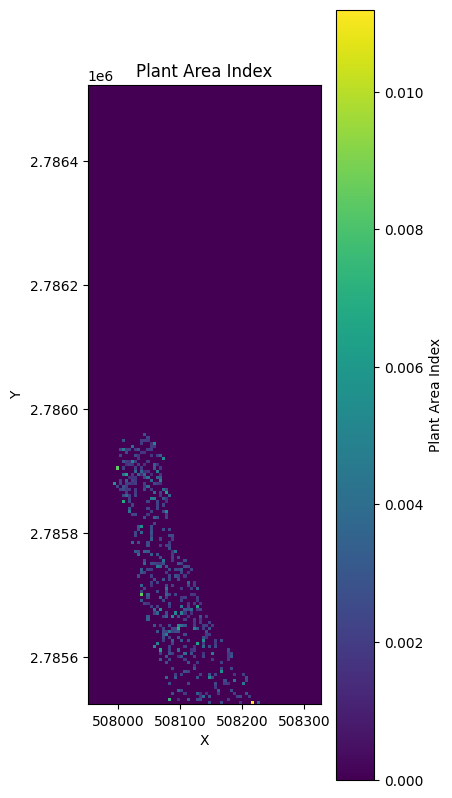

Plant Area Index (PAI) Visualization Complete!


In [135]:

import numpy as np
import pandas as pd
from pyforestscan.process import assign_voxels
from pyforestscan.calculate import calculate_pad, calculate_pai
from pyforestscan.visualize import plot_metric

csv_file_path = "/projects/output.csv"  
df = pd.read_csv(csv_file_path)

ground_z = df.groupby(["X", "Y"])["Z"].min().reset_index()  
df = df.merge(ground_z, on=["X", "Y"], suffixes=("", "_ground"))  
df["HeightAboveGround"] = df["Z"] - df["Z_ground"]  

pointclouds_array = np.array(
    list(zip(df["X"], df["Y"], df["HeightAboveGround"])), 
    dtype=[("X", "f4"), ("Y", "f4"), ("HeightAboveGround", "f4")]
)

voxel_resolution = (5, 5, 1)
voxels, extent = assign_voxels(pointclouds_array, voxel_resolution)

print(f"Voxels Assigned: {voxels.shape}")

pad = calculate_pad(voxels, voxel_resolution[-1])

pai = calculate_pai(pad)

plot_metric("Plant Area Index", pai, extent, metric_name='Plant Area Index', cmap='viridis')
print("Plant Area Index (PAI) Visualization Complete!")


In [91]:
import rasterio
import matplotlib.pyplot as plt


In [93]:
import rasterio
print(dir(rasterio))  

['__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_env', '_err', '_filepath', '_path', '_transform', '_version', 'control', 'enums', 'env', 'errors', 'rpc', 'session', 'transform']


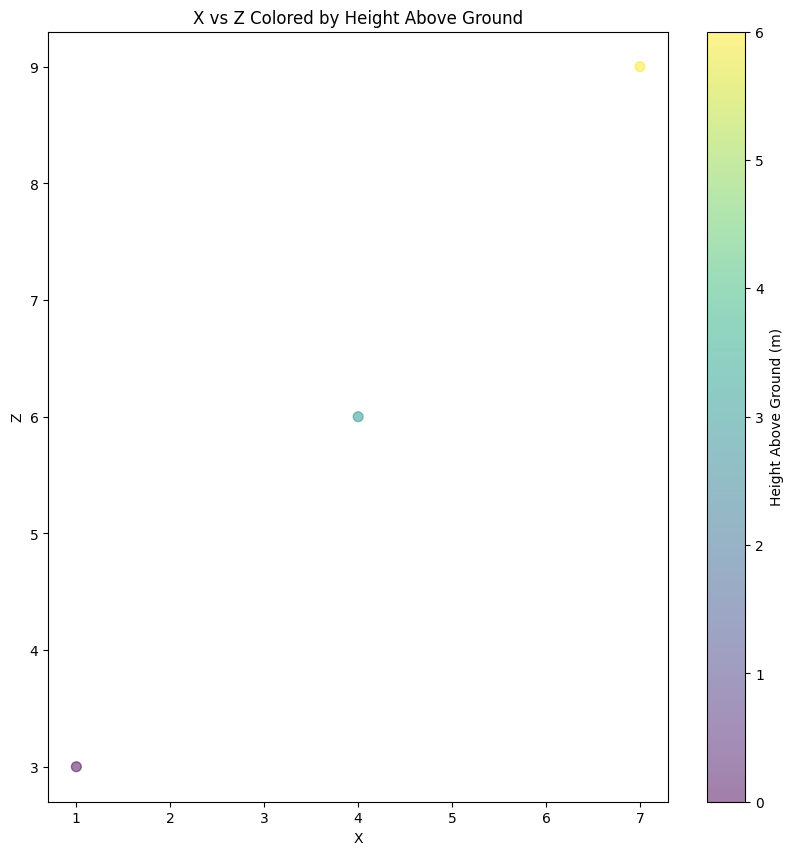

✅ 2D LiDAR Plot Created Successfully!


In [123]:
# from pyforestscan.visualize plot_2d works
from pyforestscan.visualize import plot_2d
import numpy as np
import pandas as pd

test_points = pd.DataFrame({
    "X": [1, 4, 7],
    "Y": [2, 5, 8],
    "Z": [3, 6, 9]
})


test_points["HeightAboveGround"] = test_points["Z"] - test_points["Z"].min()


structured_array = np.array(
    list(zip(test_points["X"], test_points["Y"], test_points["Z"], test_points["HeightAboveGround"])),
    dtype=[("X", "f4"), ("Y", "f4"), ("Z", "f4"), ("HeightAboveGround", "f4")]
)

plot_2d(structured_array, x_dim='X', y_dim='Z', alpha=0.5, point_size=50, fig_size=(10, 10))

print("✅ 2D LiDAR Plot Created Successfully!")


In [124]:
from pyforestscan.calculate import calculate_fhd
import numpy as np

# Simulate voxel density data
voxels = np.random.randint(0, 10, size=(5, 5, 10))

# Compute FHD
fhd = calculate_fhd(voxels)

print("Foliage Height Diversity (FHD):", fhd)


Foliage Height Diversity (FHD): [[2.15728569 2.02549637 2.02105654 1.89255632 2.07298469]
 [2.1121094  2.06510074 2.14781861 1.85529789 2.05884472]
 [2.19331192 2.25066458 2.21724918 2.05561984 1.94245925]
 [2.13633683 1.82559137 1.71668174 1.94361057 2.15482996]
 [2.20225681 1.97716454 2.07452861 2.24890599 1.77667497]]


tested and works in maap ade 

pyforestscan.handlers:
read_lidar

pyforestscan.calculate
calculate_pad 
calculate_pai
calculate_chm
calculate_fhd
assign_voxels

pyforestscan.visualize:
plot_2d
plot_metric

create_geotiff, write_las not compatiable

`process_with_tiles` may be will work with another dataset. not throwing error but not completing processing too

In [ ]:
from pyforestscan.process import process_with_tiles
import numpy as np
import time

# Define the path to your EPT data and tile parameters
ept_path = "https://s3-us-west-2.amazonaws.com/usgs-lidar-public/IA_FullState/ept.json"
tile_size = (500, 500)  
tile_overlap = 50  
metric = "elevation"  
voxel_size = 1.0  


try:
    print("Processing LiDAR data with tiles...")
    
    # Start timing the process
    start_time = time.time()

    tiles_result = process_with_tiles(ept_path, tile_size, tile_overlap, metric, voxel_size)
    
    # Calculate elapsed time
    elapsed_time = time.time() - start_time
    print(f"LiDAR data processed successfully with tiles in {elapsed_time:.2f} seconds!")

    # Inspect processed tile results
    print(f"Processed tiles: {tiles_result.keys()}")
    print(f"Tile data (example): {tiles_result.get('tile_1', 'No data available')}")
except Exception as e:
    print(f"Error processing LiDAR data with tiles: {e}")


Processing LiDAR data with tiles...
